# Visualizing Data

This notebook contains the code to visualize datasets in the Red Sea region. In particular, the datasets used (in order of usage in this notebook) are:

- NASA GISS Surface Temperature Analysis [(link)](https://psl.noaa.gov/data/gridded/data.gistemp.html)
- NOAA Extended Reconstructed SST V5 [(link)](https://psl.noaa.gov/data/gridded/data.noaa.ersst.v5.html)
- Global Precipitation Climatology Project (GPCP) Monthly Analysis Product [(link)](https://psl.noaa.gov/data/gridded/data.gpcp.html)
- CHIRPS V3 [(link)](https://www.chc.ucsb.edu/data/chirps3)
- NOAA Global Surface Temperature [(link)](https://psl.noaa.gov/data/gridded/data.noaaglobaltemp.html)
- NOAA OI SST V2 High Resolution Dataset [(link)](https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.highres.html)

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import regex as re

In [2]:
def plot(data, low, high, season, title, subtitle):
    '''
    Function to create graphs of data in the Red Sea area given a particular time stamp.
    Parameters:
    - data: xarray DataArray containing the data to plot
    - low: minimum value for the color scale
    - high: maximum value for the color scale
    - season: string indicating the season (e.g., 'DJF')
    - title: title of the plot, typically the particular feature being plotted
    - subtitle: subtitle for the plot, typically the source dataset name
    '''
    data_redsea = data.sel(
    lat=slice(30, 10),
    lon=slice(30, 45)
    )

    units = data.attrs.get('units', '')


    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Plot the data
    data.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='coolwarm',
        cbar_kwargs={'label': units},
        vmin=low,
        vmax=high,
    )

    # Focus on the Red Sea
    ax.set_extent([30, 45, 10, 30], crs=ccrs.PlateCarree())
    # Add borders and coastlines
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    plt.suptitle(f"{title} in {season}",fontsize=24, y=1)
    plt.title(f"From {subtitle}",fontsize=16)

    plt.show()

    # Save the figure
    fig.savefig(f"plots/{subtitle.replace(' ', '')}{season}.png", bbox_inches='tight', dpi=300)

In [3]:
seasons = ['DJF', 'MAM', 'JJA', 'SON']

In [4]:
def make_plots(title, subtitle, low, high, ds, feature):
    '''
    Function to create seasonal plots for a given dataset.
    Parameters:
    - title: title of the plot, typically the particular feature being plotted
    - subtitle: subtitle for the plot, typically the source dataset name
    - low: minimum value for the color scale
    - high: maximum value for the color scale
    - ds: xarray Dataset containing the data
    - feature: string indicating the feature to plot (e.g., 'sst', 'air')
    '''

    # Get the seasonal averages for the specified feature
    ds_list = [
        ds[feature].sel(time=ds['time'].dt.month.isin([12, 1, 2])).mean(dim='time'),
        ds[feature].sel(time=ds['time'].dt.month.isin([3, 4, 5])).mean(dim='time'),
        ds[feature].sel(time=ds['time'].dt.month.isin([6, 7, 8])).mean(dim='time'),
        ds[feature].sel(time=ds['time'].dt.month.isin([9, 10, 11])).mean(dim='time')
    ]
    # Create plots for each season
    for f, season in zip(ds_list, seasons):
        plot(f, low, high, season, title, subtitle)

In [5]:
airds = xr.open_dataset("air.2x2.250.mon.1991-2020.ltm.comb.nc")
print(airds)

<xarray.Dataset> Size: 2MB
Dimensions:             (lat: 90, lon: 180, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 360B 89.0 87.0 85.0 ... -85.0 -87.0 -89.0
  * lon                 (lon) float32 720B 1.0 3.0 5.0 7.0 ... 355.0 357.0 359.0
  * time                (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 ...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] 192B ...
    air                 (time, lat, lon) float32 778kB ...
    valid_yr_count      (time, lat, lon) float32 778kB ...
Attributes:
    title:                          GISS Surface Temperature Analysis (GISTEM...
    platform:                       Analysis
    Source:                         http://data.giss.nasa.gov/gistemp/ source...
    Documentation:                  http://www.esrl.noaa.gov/psd/data/gridded...
    Conventions:                    COARDS
    history:                        Created 2021/02/09 by doMonthLTM
    data

/Users/chaiharsha/Documents/CobbLab/CobbLab/env/lib/python3.9/site-packages/xarray/coding/times.py:992: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/chaiharsha/Documents/CobbLab/CobbLab/env/lib/python3.9/site-packages/xarray/core/indexing.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


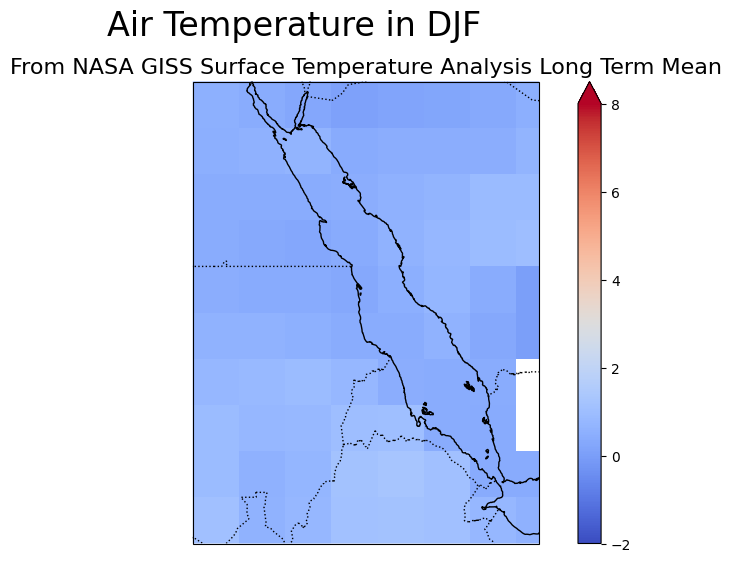

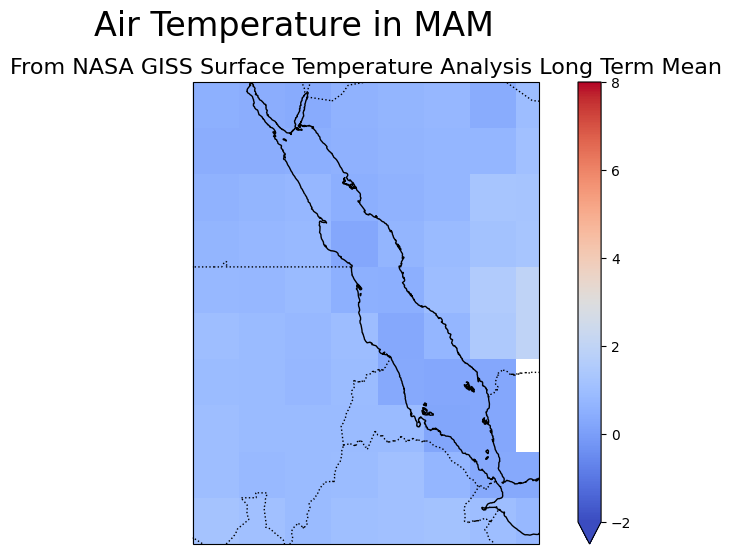

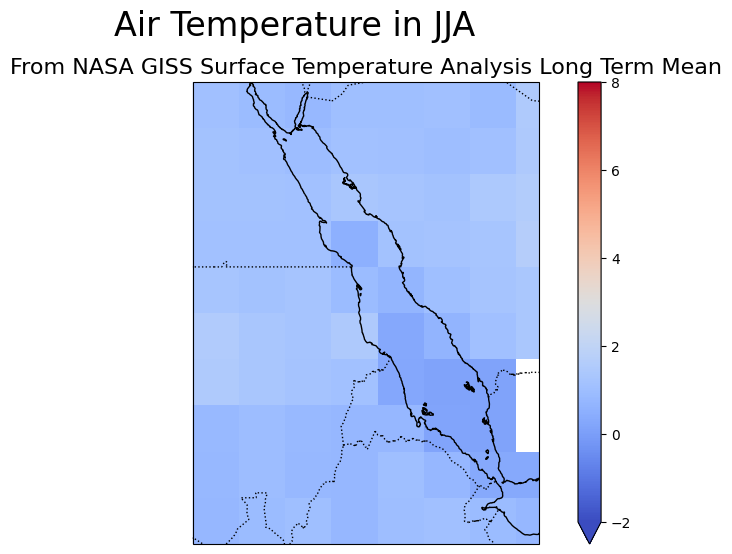

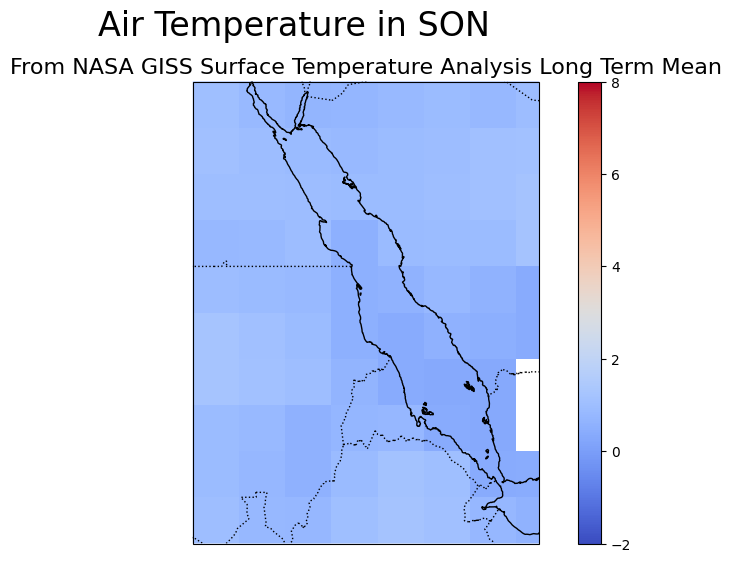

In [7]:
make_plots("Air Temperature", "NASA GISS Surface Temperature Analysis Long Term Mean", -2, 8, airds, 'air')

In [8]:
ersstds = xr.open_dataset("sst.mnmean.nc")
print(ersstds)

<xarray.Dataset> Size: 132MB
Dimensions:    (lat: 89, lon: 180, time: 2056, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2025-04-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 33kB ...
    sst        (time, lat, lon) float32 132MB ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
 

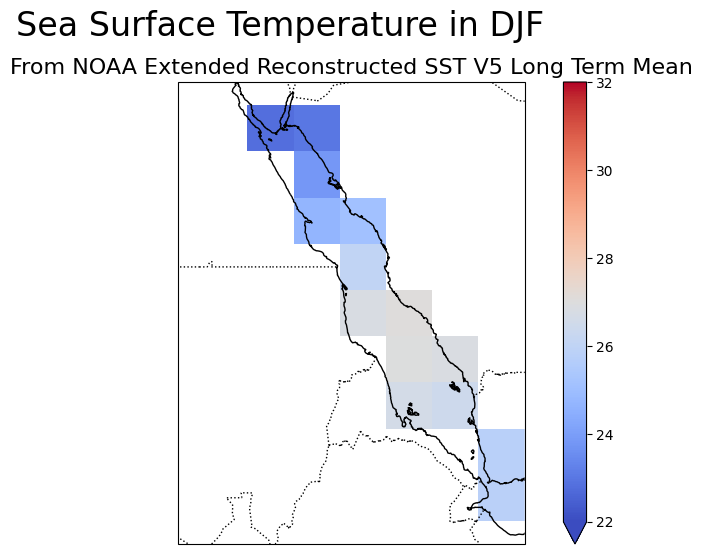

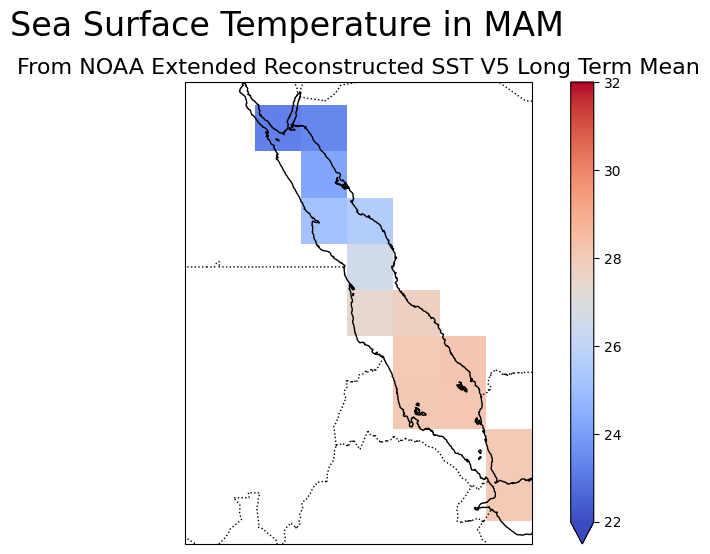

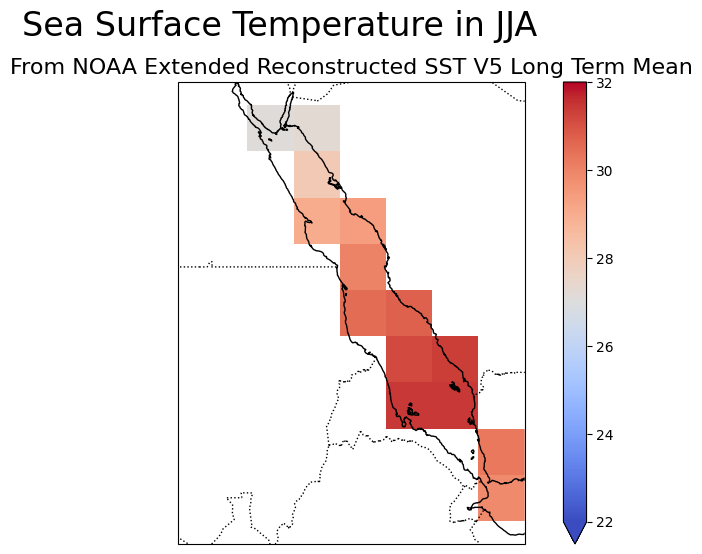

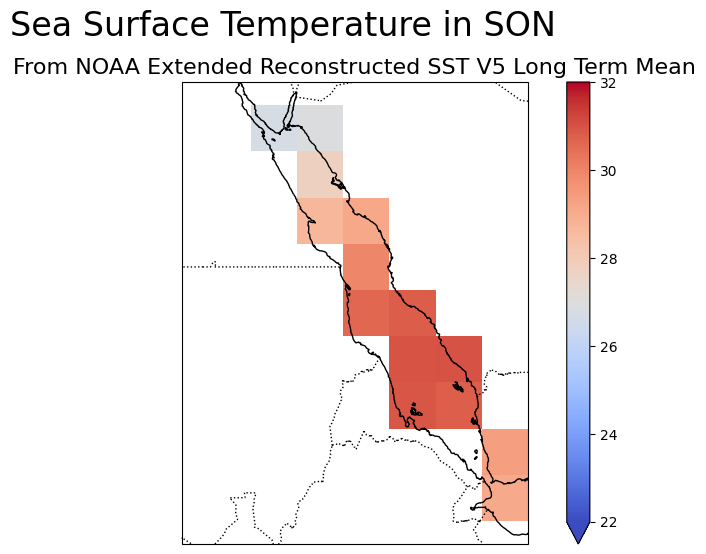

In [9]:
make_plots("Sea Surface Temperature", "NOAA Extended Reconstructed SST V5 Long Term Mean", 22, 32, ersstds, 'sst')

In [10]:
gpcpds = xr.open_dataset("precip.mon.mean.nc")
print(gpcpds)

<xarray.Dataset> Size: 23MB
Dimensions:    (lat: 72, lon: 144, time: 556, nv: 2)
Coordinates:
  * lat        (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon        (lon) float32 576B 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2025-04-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 9kB ...
    lat_bnds   (lat, nv) float32 576B ...
    lon_bnds   (lon, nv) float32 1kB ...
    precip     (time, lat, lon) float32 23MB ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR 

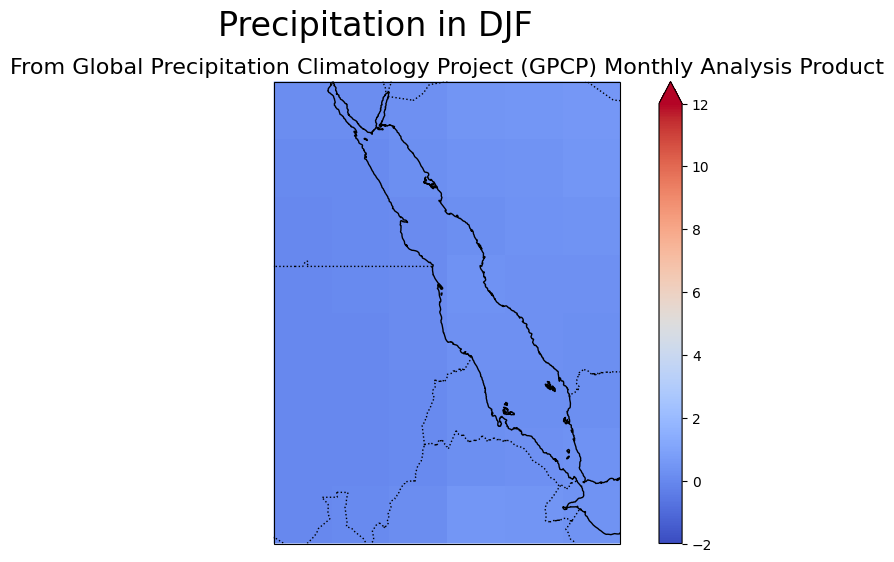

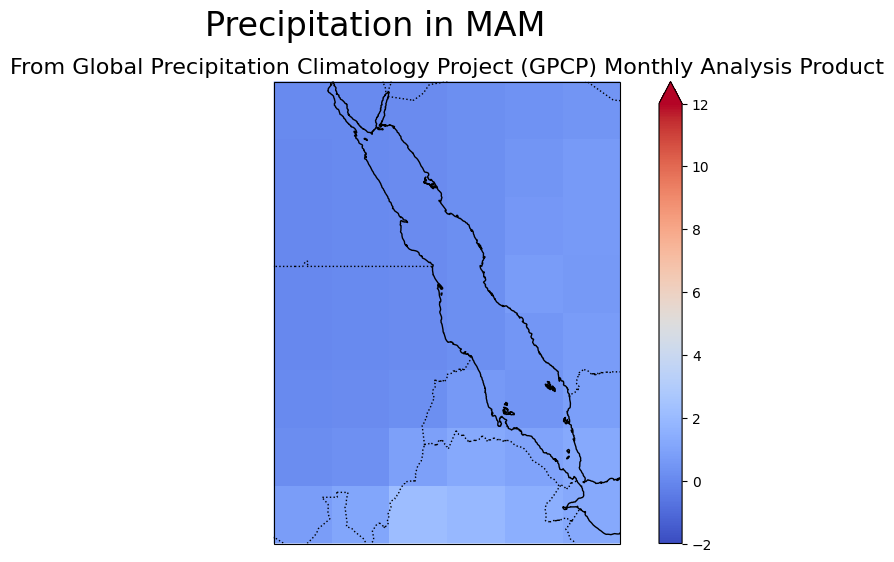

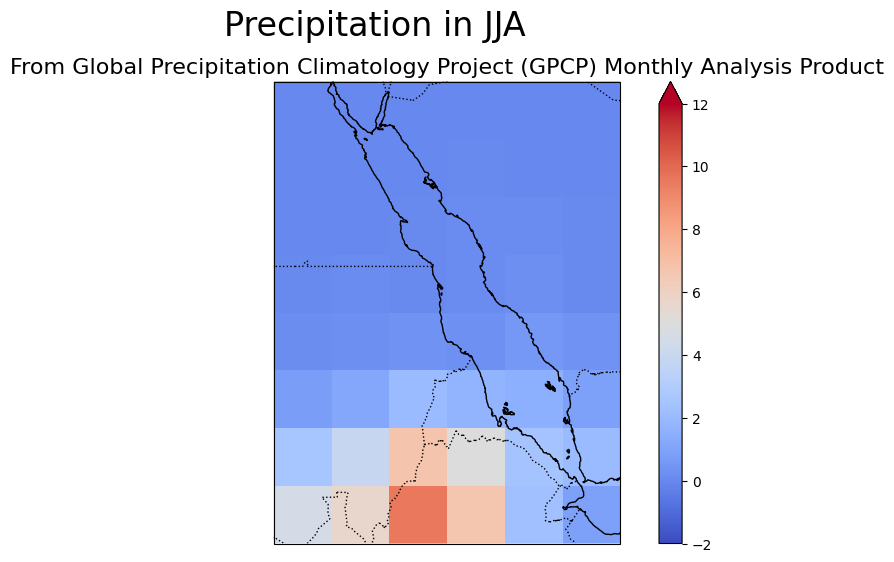

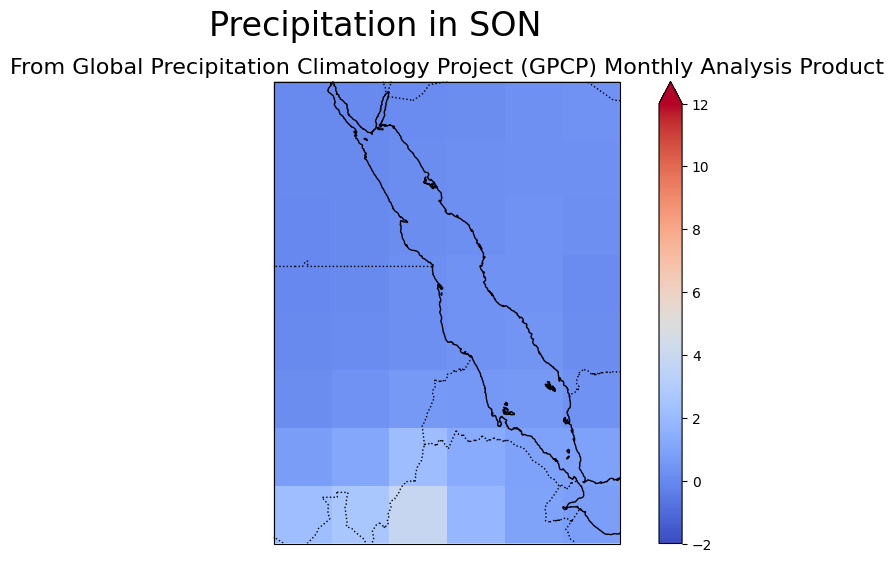

In [11]:
make_plots("Precipitation", "Global Precipitation Climatology Project (GPCP) Monthly Analysis Product", -2, 12, gpcpds, 'precip')

In [12]:
chirpsds = xr.open_dataset("chirps-v3.0.monthly.nc")
print(chirpsds)

<xarray.Dataset> Size: 37GB
Dimensions:    (latitude: 2400, longitude: 7200, time: 532)
Coordinates:
  * latitude   (latitude) float32 10kB -59.97 -59.92 -59.88 ... 59.92 59.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 4kB 1981-01-01 1981-02-01 ... 2025-04-01
Data variables:
    precip     (time, latitude, longitude) float32 37GB ...
Attributes: (12/14)
    Conventions:       CF-1.6
    title:             CHIRPS Version 3.0
    history:           created by Climate Hazards Center
    version:           Version 3.0
    data_created:      2025-05-14
    creator_name:      Pete Peterson
    ...                ...
    documentation:     http://pubs.usgs.gov/ds/832/
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    acknowledgements:  The Climate Hazards Center InfraRed Precipitation with...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/chg/products/CHIRPS...
    website:   

Chirps is a stupid dataset that uses "latitude" and "longitude" instead of "lat" and "lon". Hence, the same functions as before, but with this modification.

In [13]:
def plot_chirps(data, low, high, season, title, subtitle):
    data_redsea = data.sel(
    latitude=slice(30, 10),
    longitude=slice(30, 45)
    )

    units = data.attrs.get('units', '')


    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Plot the data
    data.plot(
        ax=ax,
        transform=ccrs.PlateCarree(),
        cmap='coolwarm',
        cbar_kwargs={'label': units},
        vmin=low,
        vmax=high,
    )

    # Focus on the Red Sea
    ax.set_extent([30, 45, 10, 30], crs=ccrs.PlateCarree())
    # Add borders and coastlines
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    plt.suptitle(f"{title} in {season}",fontsize=24, y=1)
    plt.title(f"From {subtitle}",fontsize=16)

    plt.show()

    # Save the figure
    fig.savefig(f"{subtitle.replace(' ', '')}{season}.png", bbox_inches='tight', dpi=300)

def make_plots_chirps(title, subtitle, low, high, ds, feature):
    ds_list = [
        ds[feature].sel(time=ds['time'].dt.month.isin([12, 1, 2])).mean(dim='time'),
        ds[feature].sel(time=ds['time'].dt.month.isin([3, 4, 5])).mean(dim='time'),
        ds[feature].sel(time=ds['time'].dt.month.isin([6, 7, 8])).mean(dim='time'),
        ds[feature].sel(time=ds['time'].dt.month.isin([9, 10, 11])).mean(dim='time')
    ]
    for f, season in zip(ds_list, seasons):
        plot_chirps(f, low, high, season, title, subtitle)

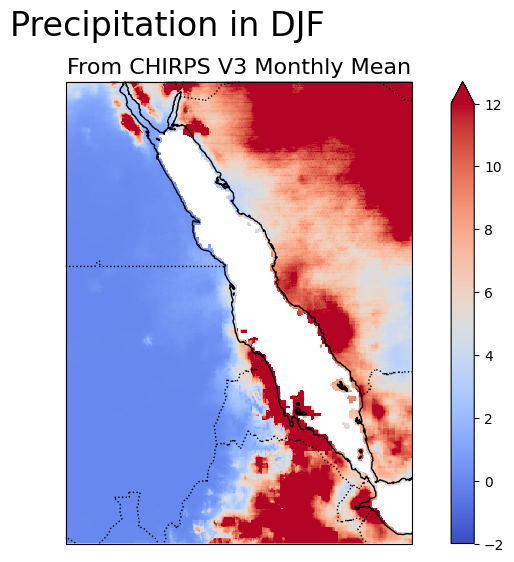

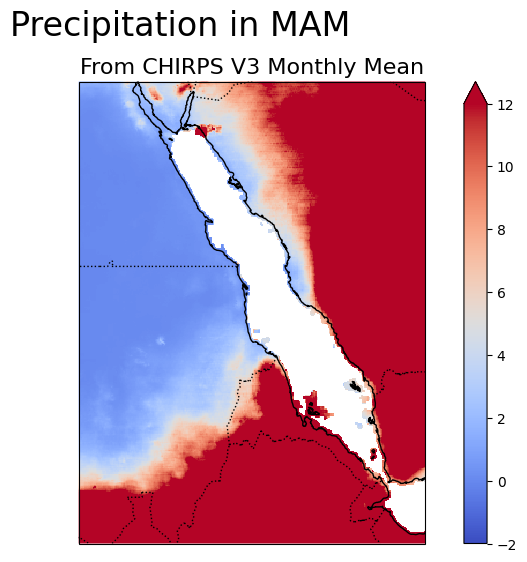

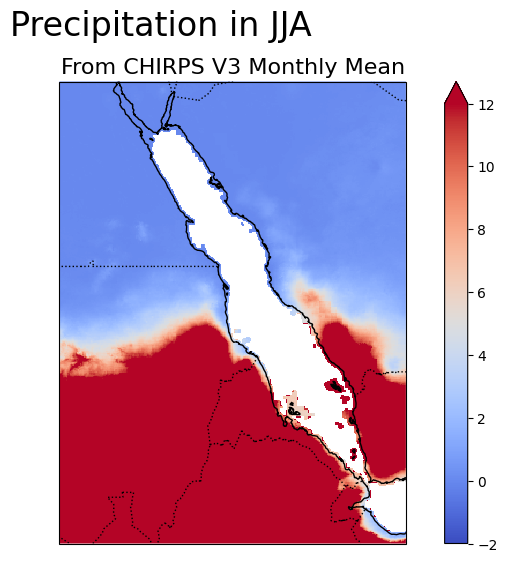

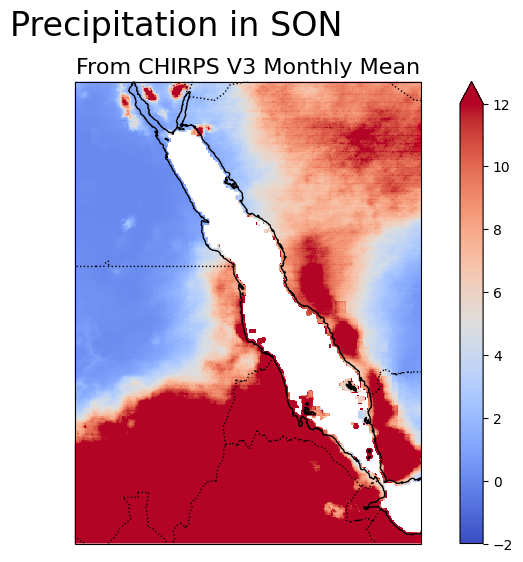

In [14]:
make_plots_chirps("Precipitation", "CHIRPS V3 Monthly Mean", -2, 12, chirpsds, 'precip')

In [15]:
noaagstds = xr.open_dataset("air.mon.v6.ltm.1991.2020.nc")
print(noaagstds)

<xarray.Dataset> Size: 250kB
Dimensions:             (lat: 36, lon: 72, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 144B -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                 (lon) float32 288B 2.5 7.5 12.5 ... 347.5 352.5 357.5
  * time                (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 ...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] 192B ...
    air                 (time, lat, lon) float32 124kB ...
    valid_yr_count      (time, lat, lon) float32 124kB ...
Attributes: (12/24)
    Conventions:                    CF-1.0
    dataset_title:                  NOAA Global Surface Temperature (NOAAGlob...
    keywords_vocabulary:            Climate and Forecast (CF) Standard Name T...
    keywords:                       Earth Science > Oceans > Ocean Temperatur...
    cdm_data_type:                  Grid
    climatology:                    Climatology is based on 1971-2000 month

/Users/chaiharsha/Documents/CobbLab/CobbLab/env/lib/python3.9/site-packages/xarray/coding/times.py:992: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/chaiharsha/Documents/CobbLab/CobbLab/env/lib/python3.9/site-packages/xarray/core/indexing.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


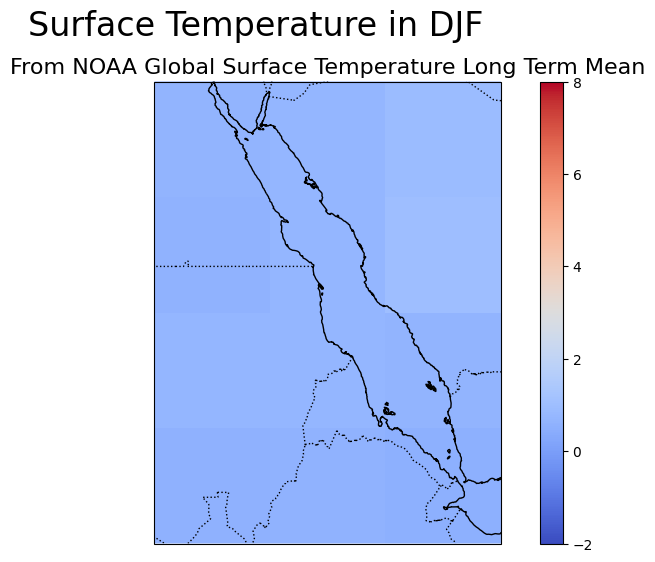

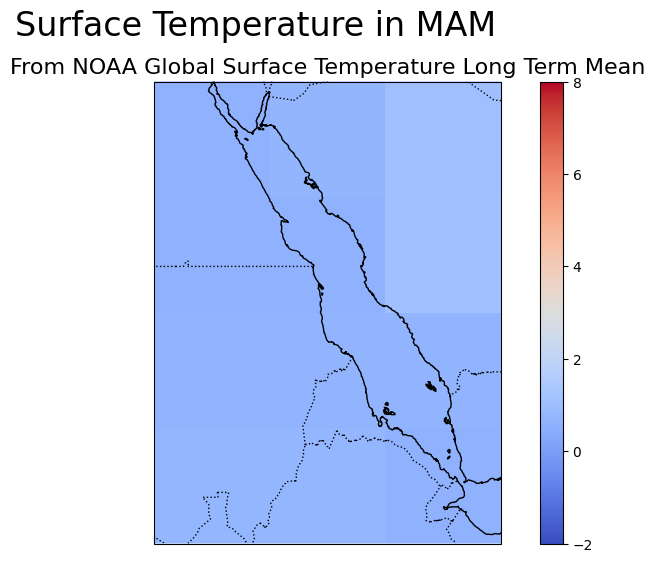

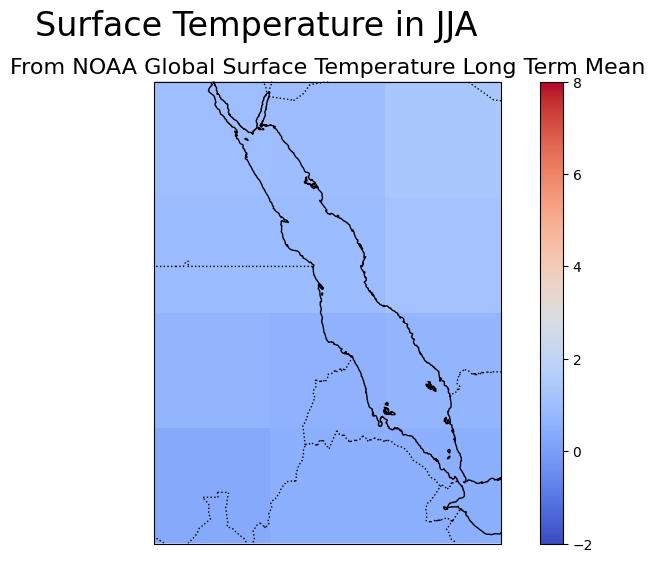

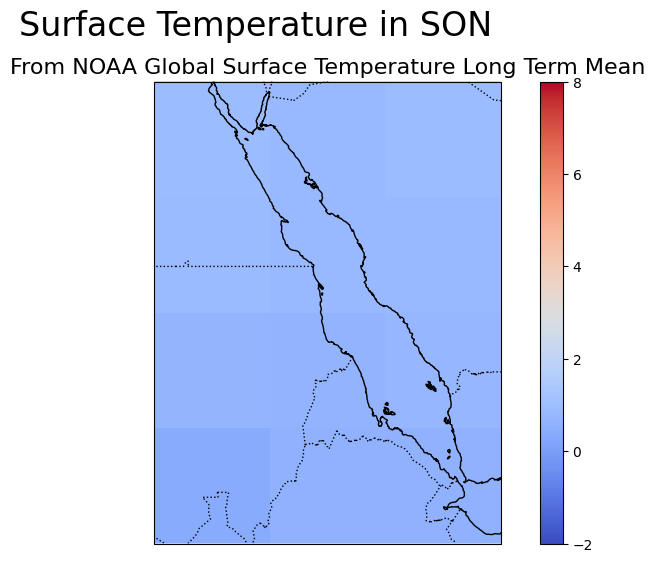

In [16]:
make_plots("Surface Temperature", "NOAA Global Surface Temperature Long Term Mean", -2, 8, noaagstds, 'air')

In [17]:
oissthrds = xr.open_dataset("sst.mon.mean.nc")
print(oissthrds)

<xarray.Dataset> Size: 2GB
Dimensions:  (time: 524, lat: 720, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1981-09-01 1981-10-01 ... 2025-04-01
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 2GB ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...


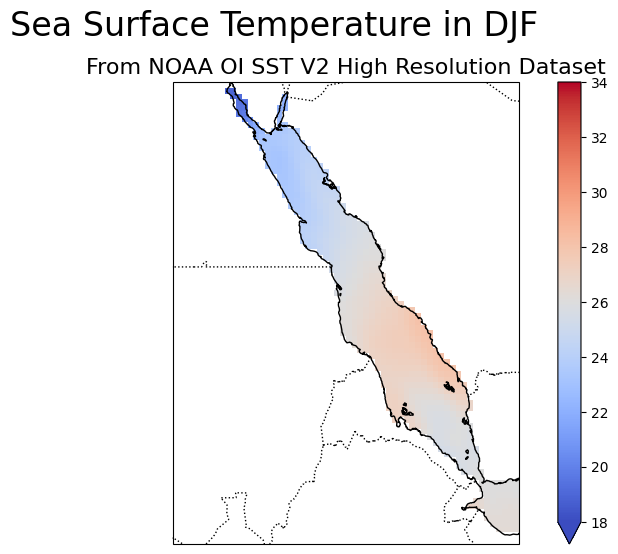

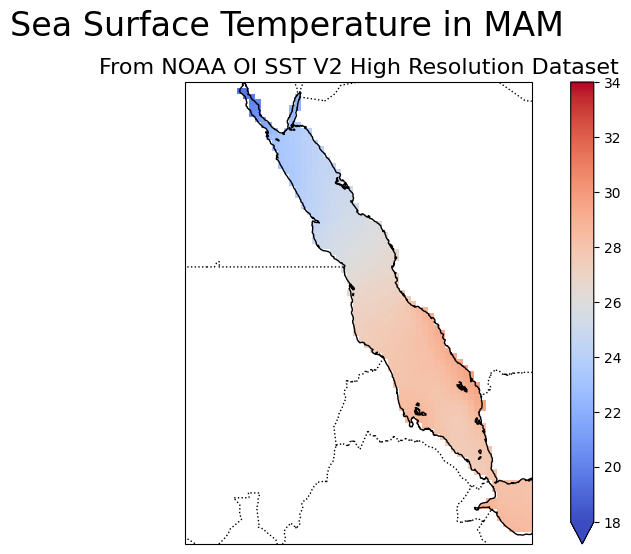

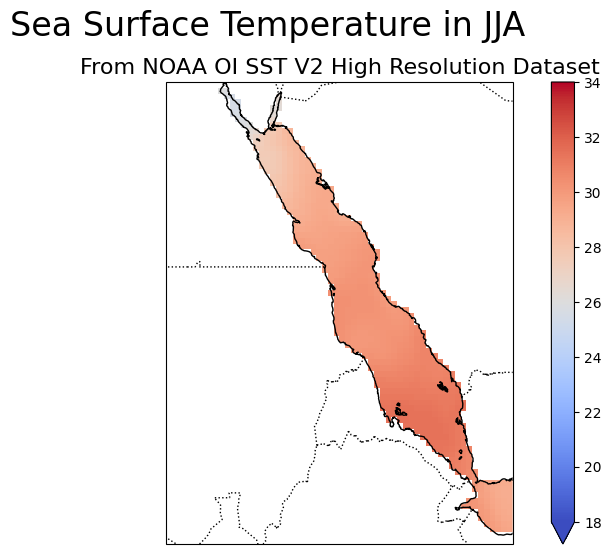

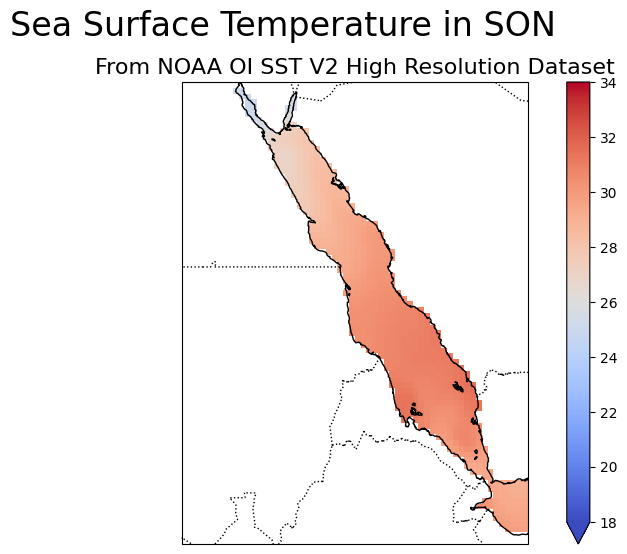

In [18]:
make_plots("Sea Surface Temperature", "NOAA OI SST V2 High Resolution Dataset", 18, 34, oissthrds, 'sst')